In [78]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [80]:
df = pd.read_csv('data.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [81]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [82]:
columns_to_keep = ['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg', 'msrp']
df = df[columns_to_keep]

In [83]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500


In [84]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [85]:
df.engine_hp = df.engine_hp.fillna(0)
df.engine_cylinders = df.engine_cylinders.fillna(0)

In [86]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [87]:
mean = df['msrp'].mean()

df['above_average'] = np.where(df['msrp']>=mean,1,0)

In [88]:
df = df.reset_index(drop=True)
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,46120,1
11910,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,56670,1
11911,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,50620,1
11912,acura,zdx,2013,300.0,6.0,automatic,4dr_hatchback,23,16,50920,1


In [89]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [90]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,toyota,highlander_hybrid,2016,280.0,6.0,automatic,4dr_suv,28,27,50485
1,chevrolet,impala_limited,2014,300.0,6.0,automatic,sedan,30,18,26840
2,buick,regal,2016,259.0,4.0,automatic,sedan,27,19,36490
3,volkswagen,cc,2015,280.0,6.0,automated_manual,sedan,25,17,43575
4,dodge,grand_caravan,2016,283.0,6.0,automatic,passenger_minivan,25,17,22595
...,...,...,...,...,...,...,...,...,...,...
7143,subaru,impreza,2015,148.0,4.0,manual,4dr_hatchback,33,24,20995
7144,infiniti,qx50,2016,325.0,6.0,automatic,4dr_suv,24,17,35850
7145,honda,fit,2017,130.0,4.0,automatic,4dr_hatchback,37,32,20265
7146,audi,200,1991,162.0,5.0,automatic,sedan,20,16,2000


In [91]:
engine_hp = ['engine_hp']
engine_cylinders = ['engine_cylinders']
highway_mpg = ['highway_mpg']
city_mpg = ['city_mpg']

In [92]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[engine_hp].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [93]:
val_dict = df_val[engine_hp].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]

In [94]:
from sklearn.metrics import roc_auc_score

In [95]:
roc_auc_score(y_val, y_pred)

0.9153308465235073

In [96]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,toyota,highlander_hybrid,2016,280.0,6.0,automatic,4dr_suv,28,27,50485
1,chevrolet,impala_limited,2014,300.0,6.0,automatic,sedan,30,18,26840
2,buick,regal,2016,259.0,4.0,automatic,sedan,27,19,36490
3,volkswagen,cc,2015,280.0,6.0,automated_manual,sedan,25,17,43575
4,dodge,grand_caravan,2016,283.0,6.0,automatic,passenger_minivan,25,17,22595
...,...,...,...,...,...,...,...,...,...,...
7143,subaru,impreza,2015,148.0,4.0,manual,4dr_hatchback,33,24,20995
7144,infiniti,qx50,2016,325.0,6.0,automatic,4dr_suv,24,17,35850
7145,honda,fit,2017,130.0,4.0,automatic,4dr_hatchback,37,32,20265
7146,audi,200,1991,162.0,5.0,automatic,sedan,20,16,2000


In [97]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[engine_cylinders].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

val_dict = df_val[engine_cylinders].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7690689320336834

In [98]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[highway_mpg].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

val_dict = df_val[highway_mpg].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6286428845579014

In [99]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[city_mpg].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

val_dict = df_val[city_mpg].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6699949414821458

In [100]:
columns_to_use = ['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg']

In [101]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[columns_to_use].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [102]:
val_dict = df_val[columns_to_use].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.976568980673278

In [103]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [104]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)

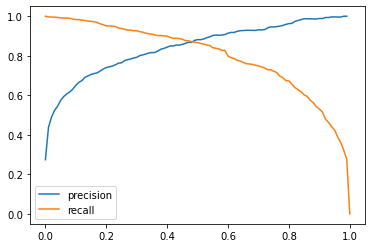

In [105]:
plt.plot(df_scores.threshold, df_scores['p'], label='precision')
plt.plot(df_scores.threshold, df_scores['r'], label='recall')
plt.legend()

In [106]:
df_scores['f1'] = 2 * (df_scores.p * df_scores.r) / (df_scores.p + df_scores.r)

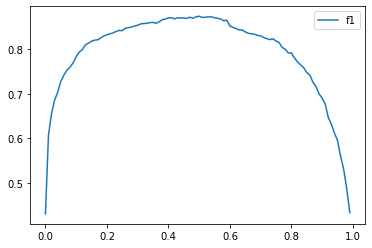

In [107]:
plt.plot(df_scores.threshold, df_scores['f1'], label='f1')
plt.legend()

In [108]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[columns_to_use].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [109]:
dv, model = train(df_train, y_train, 1.0)

In [111]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,toyota,highlander_hybrid,2016,280.0,6.0,automatic,4dr_suv,28,27,50485
1,chevrolet,impala_limited,2014,300.0,6.0,automatic,sedan,30,18,26840
2,buick,regal,2016,259.0,4.0,automatic,sedan,27,19,36490
3,volkswagen,cc,2015,280.0,6.0,automated_manual,sedan,25,17,43575
4,dodge,grand_caravan,2016,283.0,6.0,automatic,passenger_minivan,25,17,22595
...,...,...,...,...,...,...,...,...,...,...
7143,subaru,impreza,2015,148.0,4.0,manual,4dr_hatchback,33,24,20995
7144,infiniti,qx50,2016,325.0,6.0,automatic,4dr_suv,24,17,35850
7145,honda,fit,2017,130.0,4.0,automatic,4dr_hatchback,37,32,20265
7146,audi,200,1991,162.0,5.0,automatic,sedan,20,16,2000


In [112]:
def predict(df, dv, model):
    dicts = df[columns_to_use].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [113]:
y_pred = predict(df_val, dv, model)

In [114]:
from sklearn.model_selection import KFold

In [115]:
!pip install tqdm
from tqdm.auto import tqdm

In [116]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,toyota,highlander_hybrid,2016,280.0,6.0,automatic,4dr_suv,28,27,50485
1,chevrolet,impala_limited,2014,300.0,6.0,automatic,sedan,30,18,26840
2,buick,regal,2016,259.0,4.0,automatic,sedan,27,19,36490
3,volkswagen,cc,2015,280.0,6.0,automated_manual,sedan,25,17,43575
4,dodge,grand_caravan,2016,283.0,6.0,automatic,passenger_minivan,25,17,22595
...,...,...,...,...,...,...,...,...,...,...
7143,subaru,impreza,2015,148.0,4.0,manual,4dr_hatchback,33,24,20995
7144,infiniti,qx50,2016,325.0,6.0,automatic,4dr_suv,24,17,35850
7145,honda,fit,2017,130.0,4.0,automatic,4dr_hatchback,37,32,20265
7146,audi,200,1991,162.0,5.0,automatic,sedan,20,16,2000


In [125]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.above_average.values
        y_val = df_val.above_average.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.935 +- 0.003
C=0.01 0.952 +- 0.002
C=0.1 0.971 +- 0.001
C=0.5 0.979 +- 0.002
C=1 0.978 +- 0.001
C=5 0.981 +- 0.003
C=10 0.981 +- 0.003
